In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
### Part 1: Understanding Product Categories

#**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

#1. **Frequency Tables**:
#    - Generate a frequency table for the product `category`.
#    - Which are the top 5 most listed product categories?


In [4]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [5]:

top_5_categories = frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [6]:
#2. **Visualizations**:
#    - Display the distribution of products across different categories using a bar chart. 
#       *If you face problems understanding the chart, do it for a subset of top categories.*
#    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\marle\AppData\Local\Temp\ipykernel_14296\2447396351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");


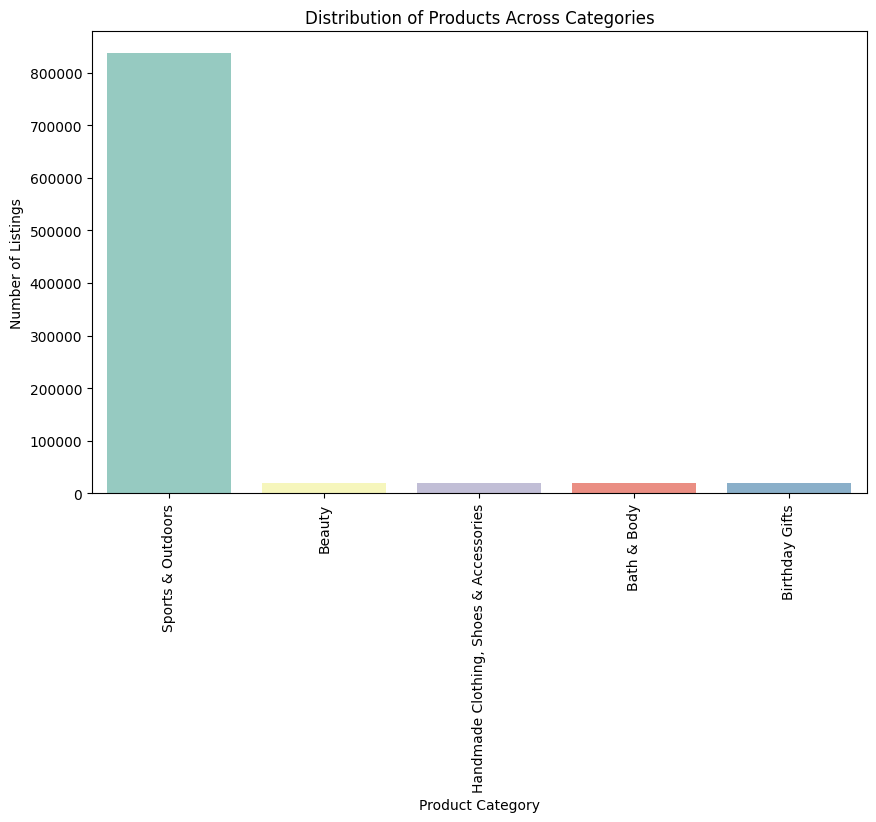

In [7]:
# Plotting a bar chart using the values from the top5 categories
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="Set3");
plt.xticks(rotation=90)
plt.title('Distribution of Products Across Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.show()

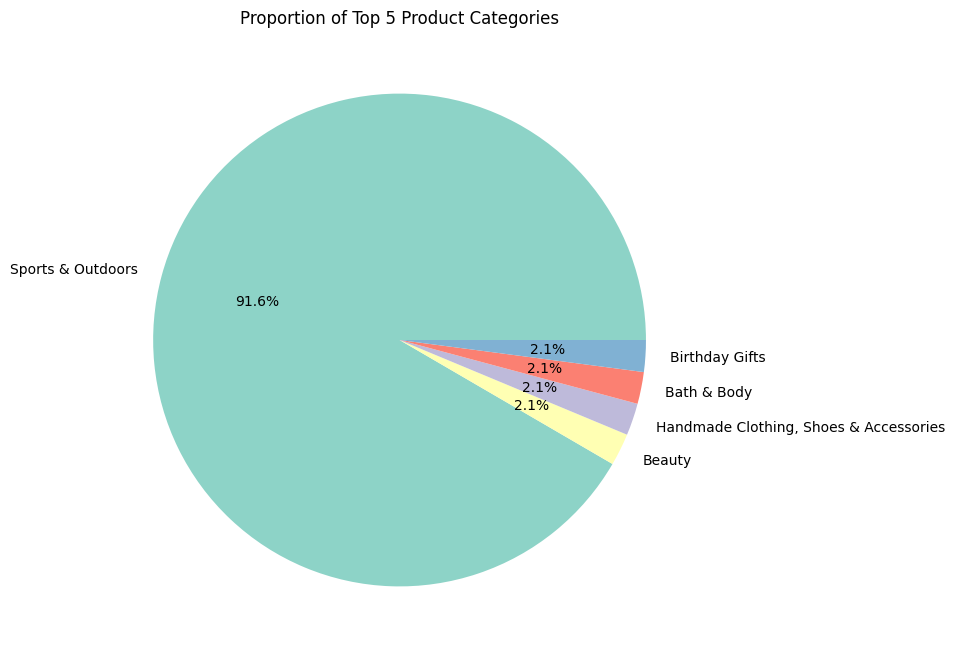

In [8]:
#pie chart for the top 5 categories
plt.figure(figsize=(8,8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

In [9]:
#Sports & Outdoors appears to dominate the listings among the top 5 categories.

In [10]:
### Part 2: Delving into Product Pricing

#**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `price` of products.
#    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [11]:
df['price'].dtypes

dtype('float64')

In [12]:
print(f'La media es:', df['price'].mean())
print(f'La mediana es:', df['price'].median())
print(f'La moda es:', df['price'].mode())

La media es: 89.24380943923661
La mediana es: 19.09
La moda es: 0    9.99
Name: price, dtype: float64


In [23]:
#Average price is 89.25, while the mode is 9.99, indicating a skewed distribution with many low-priced items.

In [14]:
#2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
#    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [24]:
print(f'La varianza es:', df['price'].var())
print(f'La desviación estándar es:', df['price'].std())
print(f'El rango es:', df['price'].max() - df['price'].min())
print(f'El rango intercuartílico es:', df['price'].quantile(0.75) - df['price'].quantile(0.25))

La varianza es: 119445.48532254901
La desviación estándar es: 345.60886175349873
El rango es: 100000.0
El rango intercuartílico es: 36.0


In [ ]:
#The product prices exhibit substantial variability. 
# While the central half of the data remains relatively concentrated (IQR = 36), the overall range expands dramatically to 100,000, revealing the presence of a few extremely high-priced items.
# This contrast, combined with a relatively large standard deviation (~346), indicates a significant spread in prices.
# The distribution is therefore likely right-skewed, driven by upper outliers that pull the maximum value far from the majority of observations.
# In practical terms, most products fall within a narrow price band, but a small subset of items introduces disproportionately large price variation.

In [15]:
#3. **Visualizations**:
#    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
#    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

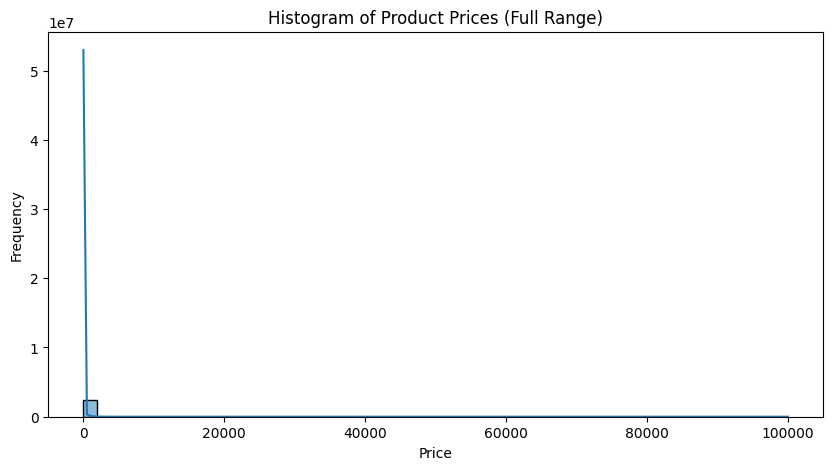

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram of Product Prices (Full Range)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [34]:
#quantiles to limit the x axis
quantile_groups = pd.qcut(df['price'], q=4)

summary = (
    quantile_groups.value_counts()
    .sort_index()
    .reset_index()
)

summary.columns = ['price_range', 'count']

summary



,price_range,count
0,"(-0.001, 9.99]",629239
1,"(9.99, 19.09]",593028
2,"(19.09, 45.99]",612341
3,"(45.99, 100000.0]",609043


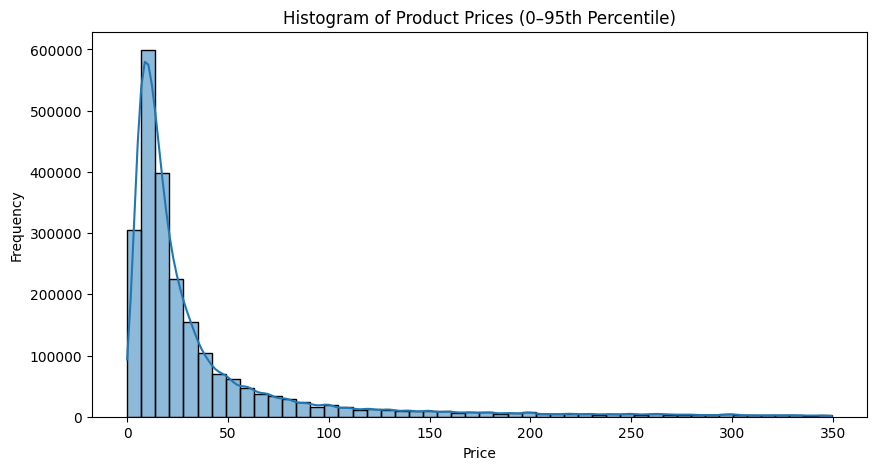

In [25]:
p95 = df['price'].quantile(0.95)

plt.figure(figsize=(10,5))
sns.histplot(df[df['price'] <= p95]['price'], bins=50, kde=True)
plt.title('Histogram of Product Prices (0–95th Percentile)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

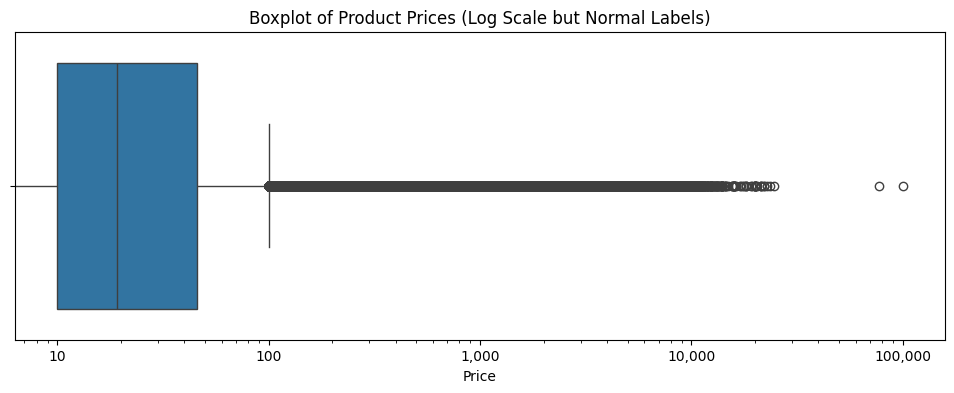

In [38]:
#The histogram reveals that the majority of products are priced below approximately £100, with a significant concentration of listings in the lower price ranges.

import matplotlib.ticker as ticker

plt.figure(figsize=(12,4))
sns.boxplot(x=df['price'])
plt.xscale('log')

# Cambiar etiquetas del eje X a números normales
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Boxplot of Product Prices (Log Scale but Normal Labels)')
plt.xlabel('Price')
plt.show()



In [ ]:
#Yes — there are products priced significantly higher than the rest.
#The box plot shows that while the interquartile range (the middle 50% of prices) is relatively narrow, there are numerous points far above the upper whisker.
#These points represent extreme outliers, meaning a small number of products are exceptionally expensive compared to the majority.
#In the standard box plot, the extreme values stretch the scale so much that the main box becomes visually compressed. 
#When applying a log scale, the spread becomes clearer and confirms the presence of a long right tail and strong price outliers.

In [16]:
### Part 3: Unpacking Product Ratings

#**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#1. **Measures of Centrality**:
#    - Calculate the mean, median, and mode for the `rating` of products.
#    - How do customers generally rate products? Is there a common trend?



In [39]:
print(f'La media es:', df['stars'].mean())
print(f'La mediana es:', df['stars'].median())
print(f'La moda es:', df['stars'].mode())

La media es: 2.152836472966066
La mediana es: 0.0
La moda es: 0    0.0
Name: stars, dtype: float64


In [ ]:
#Both the median and the mode are 0, indicating that at least half of the products have no rating at all and that 0 is the most common value in the dataset.
#However, the mean is 2.15 which suggests that among rated products, the average score is relatively low to moderate.

In [17]:
#2. **Measures of Dispersion**:
#    - Determine the variance, standard deviation, and interquartile range for product `rating`.
#    - Are the ratings consistent, or is there a wide variation in customer feedback?


In [40]:
print(f'La varianza es:', df['stars'].var())
print(f'La desviación estándar es:', df['stars'].std())
print(f'El rango es:', df['stars'].max() - df['stars'].min())
print(f'El rango intercuartílico es:', df['stars'].quantile(0.75) - df['stars'].quantile(0.25))

La varianza es: 4.817434029796864
La desviación estándar es: 2.194865378513421
El rango es: 5.0
El rango intercuartílico es: 4.4


In [ ]:
#Customer ratings show substantial variability.
#The range spans from 0 to 5 stars, which already indicates the full spectrum of possible ratings is used. 
#The interquartile range (IQR = 4.4) is very large relative to the 0–5 scale, meaning that the middle 50% of products differ widely in their ratings.
#The standard deviation (2.19) is also high for such a short scale, confirming that ratings are not concentrated around a typical value but instead spread out across the entire range.
#Overall, this suggests that customer feedback is highly inconsistent, likely driven by a mix of unrated products (0 stars) and products with genuinely diverse perceived quality.

In [18]:
#3. **Shape of the Distribution**:
#    - Calculate the skewness and kurtosis for the `rating` column. 
#    - Are the ratings normally distributed, or do they lean towards higher or lower values?


In [41]:
from scipy.stats import skew, kurtosis

skewness = skew(df['stars'], nan_policy='omit')
kurt = kurtosis(df['stars'], nan_policy='omit')

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: 0.08120730776283251
Kurtosis: -1.9260046425498398


In [ ]:
#Skewness is approximately zero (0.08), indicating that the distribution of ratings is nearly symmetric, with no substantial lean toward higher or lower values.
#Kurtosis is strongly negative (–1.93), which suggests a platykurtic distribution with lighter tails than a normal distribution. 
#This means that extreme rating values are less frequent than expected under normality and that the ratings are more evenly spread across the scale rather than concentrated around the center.
#Overall, the ratings are not normally distributed: they form a relatively flat, low-peaked distribution that is roughly symmetric but lacks heavy tails.

In [19]:
#4. **Visualizations**:
#    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

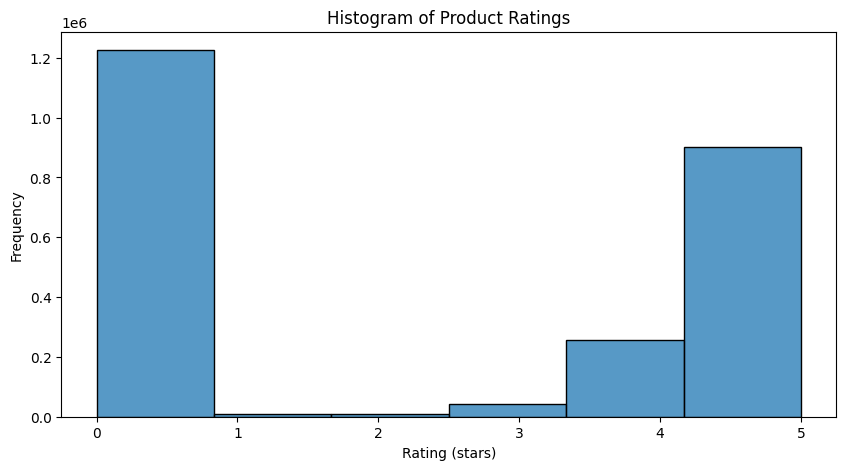

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['stars'], bins=6, kde=False)
plt.title('Histogram of Product Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3,4,5])
plt.show()


In [ ]:
#The histogram clearly shows that 0 stars is by far the most common rating, with over one million products receiving no rating at all.
#This indicates that a large portion of the catalog has never been reviewed or evaluated by customers.
#A second peak appears at the higher end of the scale, particularly at 4 and 5 stars, showing that when products do receive ratings, they tend to be positive.
#Very few items fall in the middle range (1–3 stars), which creates a U-shaped distribution: many products are unrated and many are highly rated, with relatively little feedback in between.
#Overall, product ratings are not uniformly distributed and there is a clear concentration at two extremes, with 0 stars being the most frequent rating by a large margin.